In [7]:
import pandas as pd

df = pd.read_csv('/Users/jacquesthibodeau/Desktop/household_power_consumption.txt', sep=';', low_memory=False)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


We will be creating a new column called "Date_Time" in order to take into account the date and time at the same time.

In [8]:
df = df.assign(Date_Time=pd.Series(df['Date'] + ' ' + df['Time']))
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_Time
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006 17:28:00


In the next part, we have to modify the dtypes of the different columns. After trying different combinations, I found that it is very important to include the formatting of the date and time when we use the to_datetime function since it will provide a significant performance increase.

In [9]:
import time

# start_time = time.time()
# df.iloc[:,[0,1,9]].apply(pd.to_datetime, errors='coerce')
# print("No formatting using iloc took", time.time() - start_time, "to run")
# No formatting using iloc took 1027.11 s to run

# start_time = time.time()
# pd.to_datetime(df['Date'], errors='coerce')
# pd.to_datetime(df['Time'], errors='coerce')
# pd.to_datetime(df['Date_Time'], errors='coerce')
# print("No formatting without using iloc took", time.time() - start_time, "to run")
# No formatting without using iloc took 789.15 s to run

start_time = time.time()
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
df['Date_Time'] = pd.to_datetime(df['Date_Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
print("datetime with formatting took", time.time() - start_time, " s to run")
# datetime with formatting took 18.39 s to run

df.iloc[:,2:8] = df.iloc[:,2:8].apply(pd.to_numeric, errors='coerce')
print(type(df['Date_Time'][1]))

datetime with formatting took 18.38989496231079  s to run
<class 'pandas.tslib.Timestamp'>


In [10]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


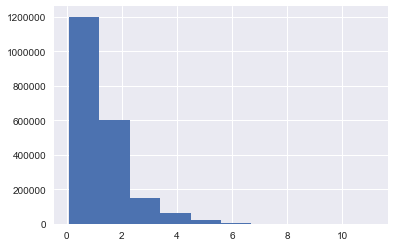

In [17]:
df['Global_active_power'].hist()

Let's plot a monthly view of what the energy usage looks like.

Now, let's see what is the average energy usage for each hour of the day.

If we were to have data from many different households, it would be possible to apply a clustering algorithm (KMeans, for example) and group together every household that consume power the same way. Therefore, it would be possible to seperate the night owls from the early risers, for example. The proper way to do this would be to apply KMeans with k = [2, 20] to find out how many (k) groups there are. It is then possible to target specific groups that will benefit the most from reducing energy usage during peak periods.